<img src="iris-machinelearning.png">

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [59]:
iris = datasets.load_iris()

In [60]:
# Build a data frame in Pandas

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

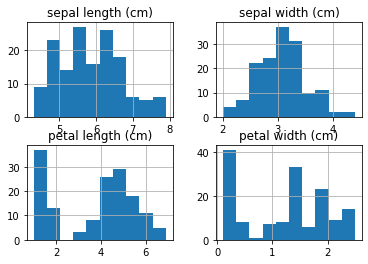

In [61]:
df.hist()

In [62]:
df['target'] = iris.target
df['target_names'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [63]:
df.target_names.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target_names, dtype: int64

<AxesSubplot:ylabel='count'>

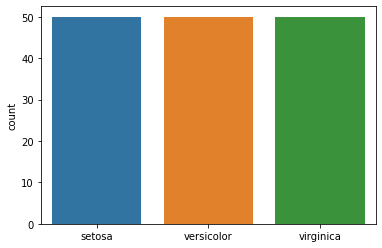

In [82]:
sns.countplot(x = df.target_names.values)

In [64]:
iris_X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
iris_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [65]:
iris_y = df['target']
iris_y;

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=30, random_state = 1)

In [67]:

# Create KNN classifier
clf = neighbors.KNeighborsClassifier(n_neighbors = 10)
# Fit the classifier to the data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN with major voting: 96.67 %


[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

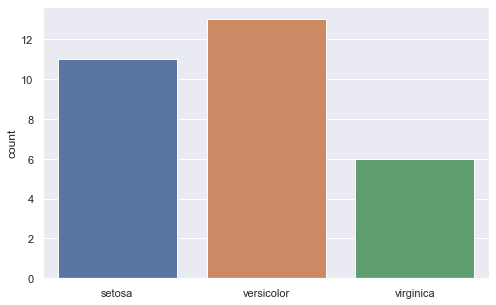

In [113]:
fig, ax = plt.subplots(figsize = (8,5))
sns.set_theme(style='darkgrid', palette='deep')
sns.countplot(x = y_test.values)
xticklabels=['setosa','versicolor', 'virginica']
ax.set_xticklabels(xticklabels)

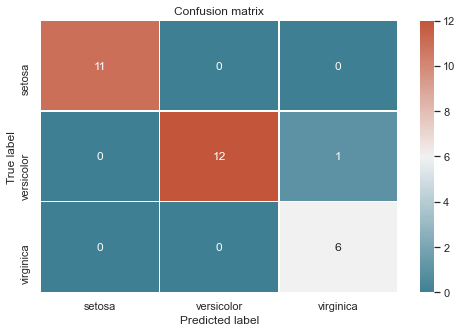

In [114]:
# Show confusion matrix in a separate window

cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm, xticklabels=['setosa','versicolor', 'virginica']
            ,yticklabels=['setosa','versicolor', 'virginica'], annot = True, fmt= "d",
            linewidths = 0.5, 
            cmap = sns.diverging_palette(220, 20, as_cmap=True))

plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# k-Fold Cross-Validation

K-fold cross-validation, more efficient model evaluation when there is fewer data.

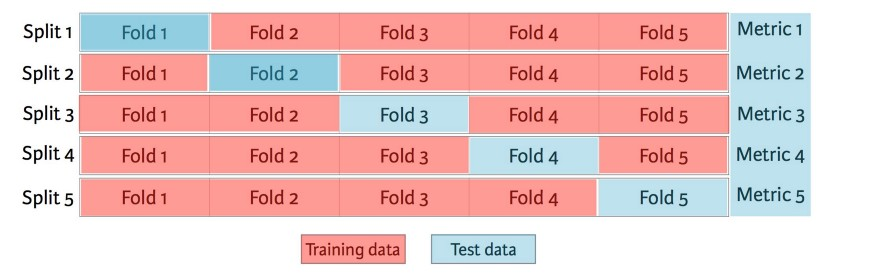

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, iris_X, iris_y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
cv_scores mean:0.9666666666666668


In [70]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit( iris_X, iris_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [71]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 6}

In [72]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9800000000000001

By using grid search to find the optimal parameter for our model, we have improved our model accuracy by over 1%!

In [73]:
d = knn_gscv.predict(X_test)

[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

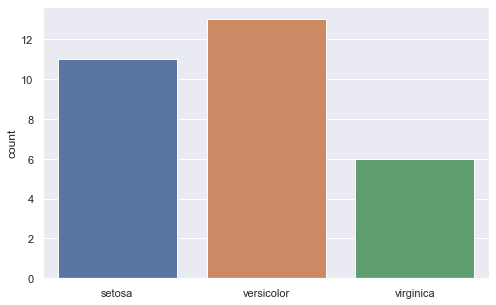

In [115]:
fig, ax = plt.subplots(figsize = (8,5))
sns.set_theme(style='darkgrid', palette='deep')
sns.countplot(x = y_test.values)
xticklabels=['setosa','versicolor', 'virginica']
ax.set_xticklabels(xticklabels)

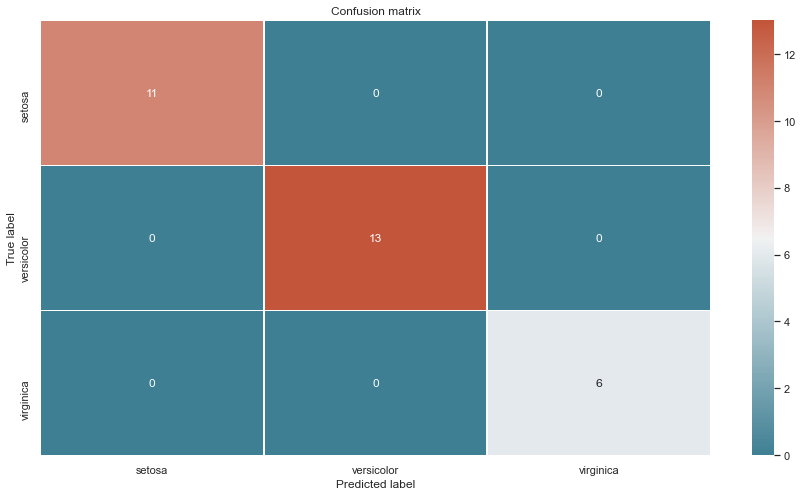

In [108]:
# Show confusion matrix in a separate window
c = confusion_matrix(y_test, d)
import seaborn as sns
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(c, xticklabels=['setosa','versicolor', 'virginica']
            ,yticklabels=['setosa','versicolor', 'virginica'], annot = True, fmt= "d",
            linewidths = 0.5, 
            cmap = sns.diverging_palette(220, 20, as_cmap=True))

plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()